# 1. Importing Libraries and Loading the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv("labeled_data.csv")

In [ ]:
dataset

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


# 2.Exploratory Data Analysis (EDA)

In [ ]:
dataset.isnull().sum()

,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


# 3.Label Transformation

In [ ]:
dataset['labels']=dataset['class'].map({0:"Hate Speech",
                                       1:"Offensive language",
                                       2:"No hate No Offensive"})

In [ ]:

dataset

,count,hate_speech,offensive_language,neither,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate No Offensive
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate No Offensive
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive language


In [ ]:
data=dataset[['tweet','labels']]

In [ ]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate No Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate No Offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,youu got wild bitches tellin you lies,Offensive language


# 4.Text Preprocessing

In [ ]:
import re
import nltk
import string

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Removal of stopwords
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [ ]:
#import stemming
stemmer=nltk.SnowballStemmer('english')

In [ ]:
#Data Cleaning
def clean_data(text):
    text=str(text).lower()
    text = re.sub("https?:?://\s|www\.$", "", text)
    text=re.sub("\[.*?\]","",text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub("\w*\d\w*",'',text)
    text=[word for word in text.split(" ") if word not in stopwords]
    text=" ".join(text)
    #Stemming the text
    text=[stemmer.stem(word) for word in text.split(" ")]
    text=" ".join(text)
    return text

In [ ]:
data['tweet']=data['tweet'].apply(clean_data)

<ipython-input-19-b5151a218221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']=data['tweet'].apply(clean_data)


In [ ]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No hate No Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language
3,rt cganderson vivabas look like tranni,Offensive language
4,rt shenikarobert shit hear might true might f...,Offensive language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive language
24779,youv gone broke wrong heart babi drove redneck...,No hate No Offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive language
24781,youu got wild bitch tellin lie,Offensive language


In [ ]:
data['tweet']

,tweet
0,rt mayasolov woman shouldnt complain clean ho...
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,rt urkindofbrand dawg rt ever fuck bitch sta...
3,rt cganderson vivabas look like tranni
4,rt shenikarobert shit hear might true might f...
...,...
24778,yous muthafin lie coreyemanuel right tl tras...
24779,youv gone broke wrong heart babi drove redneck...
24780,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitch tellin lie


# 5.Splitting the Data

In [ ]:
X=np.array(data['tweet'])
y=np.array(data['labels'])

In [ ]:
X

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 198285 stored elements and shape (24783, 26151)>

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# 6.Model Training

In [ ]:
#Building out the ML Model
from sklearn.tree import DecisionTreeClassifier
model_1=DecisionTreeClassifier(random_state=1)
model_1.fit(X_train,y_train)
y_preds_1=model_1.predict(X_test)

# 7.Model Evaluation

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score

In [ ]:
cm=confusion_matrix(y_test,y_preds_1)
cm

array([[ 102,   25,  169],
       [  18,  640,  150],
       [ 141,  119, 3593]])

In [ ]:
import seaborn as sns
colormap=sns.color_palette('Blues')

Text(50.722222222222214, 0.5, 'Predicted Values')

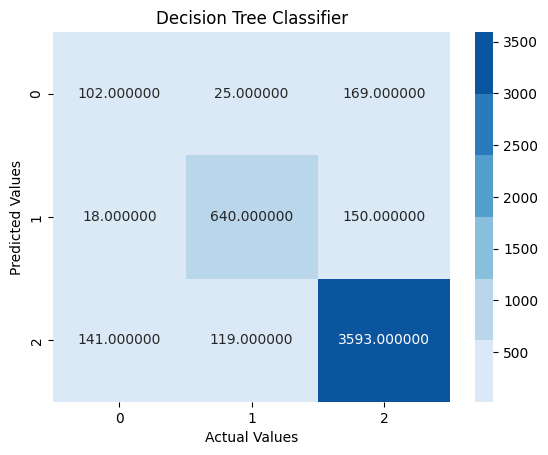

In [ ]:
sns.heatmap(cm,annot=True,fmt='f',cmap=colormap)
plt.title("Decision Tree Classifier")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [ ]:
accu_1=accuracy_score(y_test,y_preds_1)
preci_1=precision_score(y_test,y_preds_1,average='micro')
recall_1=recall_score(y_test,y_preds_1,average='micro')
print("Accuracy of Decision Tree",accu_1)
print("Precision of Decision Tree",preci_1)

Accuracy of Decision Tree 0.8745208795642526
Precision of Decision Tree 0.8745208795642526


In [ ]:
sample='Lets unit and I am tilak ravikiran varma and I am data scientist'
sample=clean_data(sample)

In [ ]:
sample

'let unit tilak ravikiran varma data scientist'

In [ ]:
data_1=cv.transform([sample]).toarray()

In [ ]:
data_1

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
model_1.predict(data_1)

array(['Offensive language'], dtype=object)

# 8.Visualizations

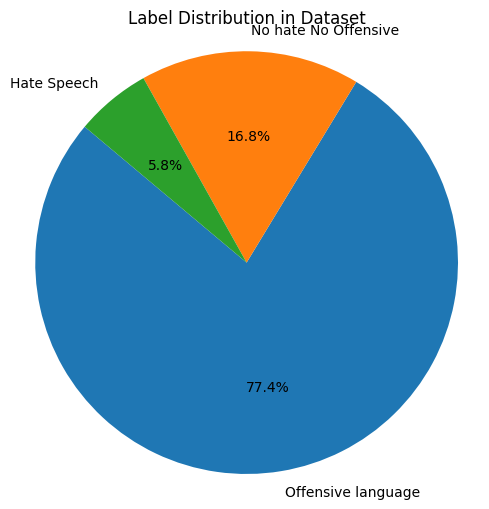

In [ ]:
import matplotlib.pyplot as plt

# Count the number of samples in each label
label_counts = dataset['labels'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


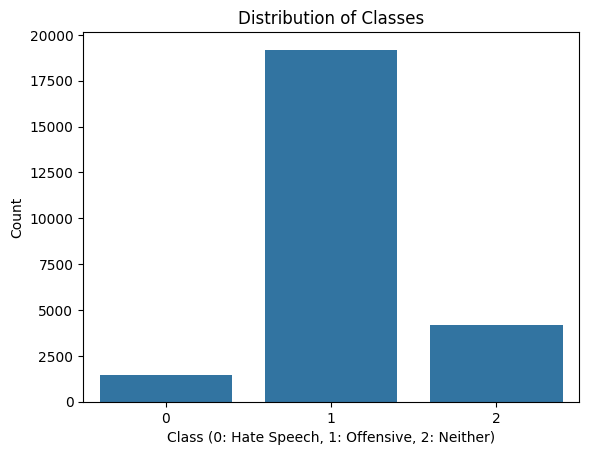

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# If your label column is still numeric (0,1,2), use this:
sns.countplot(x='class', data=dataset)
plt.title('Distribution of Classes')
plt.xlabel('Class (0: Hate Speech, 1: Offensive, 2: Neither)')
plt.ylabel('Count')
plt.show()

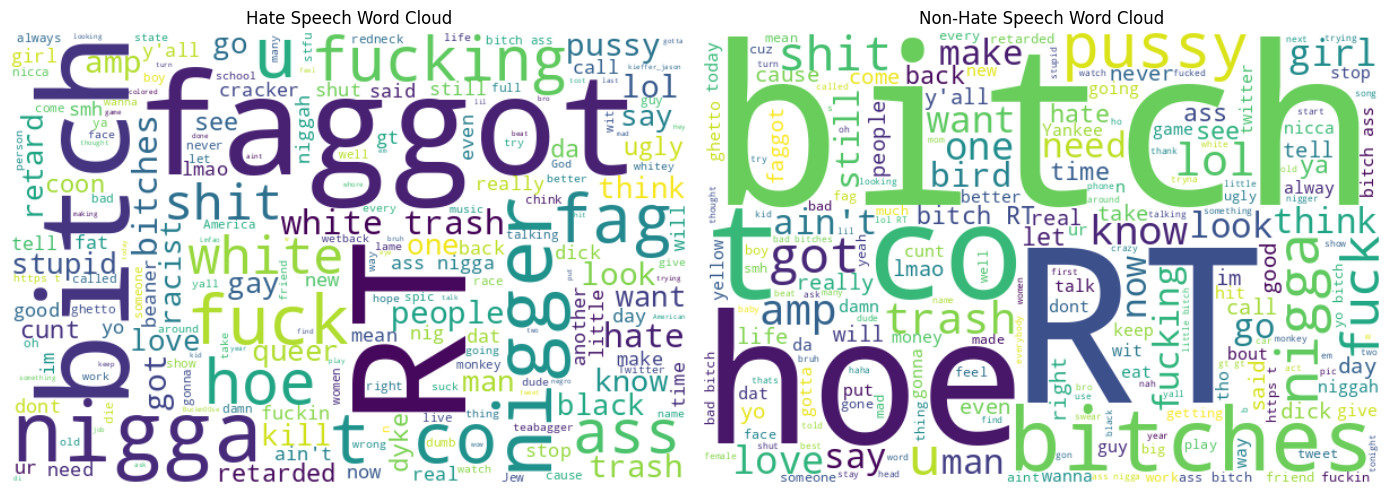

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate tweets based on label
hate_speech_text = " ".join(dataset[dataset['labels'] == 'Hate Speech']['tweet'])
non_hate_speech_text = " ".join(dataset[dataset['labels'] != 'Hate Speech']['tweet'])

# Create word clouds
plt.figure(figsize=(14, 6))

# Hate Speech Word Cloud
plt.subplot(1, 2, 1)
wordcloud_hate = WordCloud(width=600, height=400, background_color='white').generate(hate_speech_text)
plt.imshow(wordcloud_hate, interpolation='bilinear')
plt.axis('off')
plt.title('Hate Speech Word Cloud')

# Non-Hate Speech Word Cloud
plt.subplot(1, 2, 2)
wordcloud_non_hate = WordCloud(width=600, height=400, background_color='white').generate(non_hate_speech_text)
plt.imshow(wordcloud_non_hate, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Hate Speech Word Cloud')

plt.tight_layout()
plt.show()
